In [11]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences
from scipy.ndimage import gaussian_filter1d
from scipy.stats import landau

FADC_BIN_WIDTH = 1


In [ ]:
def load_pmt(input_file,pmtname, minnpe = 0., top_bottom_coinc = False):
    pmt_bottom_condition = "pmt4 >= 0"
    if(top_bottom_coinc): pmt_bottom_condition = "pmt4 >= 10" 
    data=pd.read_csv(input_file, sep ='\t',header=None)
    data.columns = ["num","id", "energy", "pmt1", "pmt2", "pmt3", "pmt4", "pmt1_FADC", "pmt2_FADC", "pmt3_FADC", "pmt4_FADC"]
    query_string_em = pmt_bottom_condition + " and (id == 1 or id == 2 or id == -2)"
    query_string_mu = pmt_bottom_condition + "and (id == 3 or id == -3)"
 
    pmt_em = data.query(query_string_em)[pmtname]
    pmt_mu = data.query(query_string_mu)[pmtname]

    pmt_mu = np.asarray(pmt_mu[pmt_mu >= minnpe])
    pmt_em = np.asarray(pmt_em[pmt_em >= minnpe])
    pmt_tot = np.concatenate((pmt_mu,pmt_em))
    
    return pmt_em, pmt_mu, pmt_tot

def load_top_sum_fadc_pmt(input_file, minnpe = 0., top_bottom_coinc = False): 
    pmt_bottom_condition = "pmt4 >= 0 "
    if(top_bottom_coinc): pmt_bottom_condition = "pmt4 >= 10" 
    data=pd.read_csv(input_file, sep ='\t',header=None)
    data.columns = ["num","id", "energy", "pmt1", "pmt2", "pmt3", "pmt4", "pmt1_FADC", "pmt2_FADC", "pmt3_FADC", "pmt4_FADC"]
    query_string_em = pmt_bottom_condition + " and (id == 1 or id == 2 or id == -2)"
    query_string_mu = pmt_bottom_condition + "and (id == 3 or id == -3)"
    pmt_em_1 = data.query(query_string_em)['pmt1_FADC']
    pmt_mu_1 = data.query(query_string_mu)['pmt1_FADC']
    pmt_em_2 = data.query(query_string_em)['pmt2_FADC']
    pmt_mu_2 = data.query(query_string_mu)['pmt2_FADC']
    pmt_em_3 = data.query(query_string_em)['pmt3_FADC']
    pmt_mu_3 = data.query(query_string_mu)['pmt3_FADC']

    pmt_mu_1 = np.asarray(pmt_mu_1[pmt_mu_1 >= minnpe])
    pmt_em_1 = np.asarray(pmt_em_1[pmt_em_1 >= minnpe])
    pmt_tot_1 = np.concatenate((pmt_mu_1,pmt_em_1))

    pmt_mu_2 = np.asarray(pmt_mu_2[pmt_mu_2 >= minnpe])
    pmt_em_2 = np.asarray(pmt_em_2[pmt_em_2 >= minnpe])
    pmt_tot_2 = np.concatenate((pmt_mu_2,pmt_em_2))

    pmt_mu_3 = np.asarray(pmt_mu_3[pmt_mu_3 >= minnpe])
    pmt_em_3 = np.asarray(pmt_em_3[pmt_em_3 >= minnpe])
    pmt_tot_3 = np.concatenate((pmt_mu_3,pmt_em_3))

    pmt_tot = np.concatenate((pmt_tot_1, pmt_tot_2, pmt_tot_3))
    
    return pmt_tot

def load_top_em_sum_fadc_pmt(input_file, minnpe = 0., top_bottom_coinc = False): 
    pmt_bottom_condition = "pmt4 >= 0"
    if(top_bottom_coinc): pmt_bottom_condition = "pmt4 >= 10" 
    data=pd.read_csv(input_file, sep ='\t',header=None)
    data.columns = ["num","id", "energy", "pmt1", "pmt2", "pmt3", "pmt4", "pmt1_FADC", "pmt2_FADC", "pmt3_FADC", "pmt4_FADC"]
    query_string_em = pmt_bottom_condition + " and (id == 1 or id == 2 or id == -2)"
    query_string_mu = pmt_bottom_condition + "and (id == 3 or id == -3)"
    pmt_em_1 = data.query(query_string_em)['pmt1_FADC']
    pmt_mu_1 = data.query(query_string_mu)['pmt1_FADC']
    pmt_em_2 = data.query(query_string_em)['pmt2_FADC']
    pmt_mu_2 = data.query(query_string_mu)['pmt2_FADC']
    pmt_em_3 = data.query(query_string_em)['pmt3_FADC']
    pmt_mu_3 = data.query(query_string_mu)['pmt3_FADC']

    pmt_em_1 = np.asarray(pmt_em_1[pmt_em_1 >= minnpe])

    pmt_em_2 = np.asarray(pmt_em_2[pmt_em_2 >= minnpe])

    pmt_em_3 = np.asarray(pmt_em_3[pmt_em_3 >= minnpe])

    pmt_tot = np.concatenate((pmt_em_1, pmt_em_2, pmt_em_3))
    
    return pmt_tot

def load_top_mu_sum_fadc_pmt(input_file, minnpe = 0., top_bottom_coinc = False): 
    pmt_bottom_condition = "pmt4 >= 0"
    if(top_bottom_coinc): pmt_bottom_condition = "pmt4 >= 10" 
    data=pd.read_csv(input_file, sep ='\t',header=None)
    data.columns = ["num","id", "energy", "pmt1", "pmt2", "pmt3", "pmt4", "pmt1_FADC", "pmt2_FADC", "pmt3_FADC", "pmt4_FADC"]
    query_string_em = pmt_bottom_condition + " and (id == 1 or id == 2 or id == -2)"
    query_string_mu = pmt_bottom_condition + "and (id == 3 or id == -3)"
    pmt_em_1 = data.query(query_string_em)['pmt1_FADC']
    pmt_mu_1 = data.query(query_string_mu)['pmt1_FADC']
    pmt_em_2 = data.query(query_string_em)['pmt2_FADC']
    pmt_mu_2 = data.query(query_string_mu)['pmt2_FADC']
    pmt_em_3 = data.query(query_string_em)['pmt3_FADC']
    pmt_mu_3 = data.query(query_string_mu)['pmt3_FADC']

    pmt_mu_1 = np.asarray(pmt_mu_1[pmt_mu_1 >= minnpe])

    pmt_mu_2 = np.asarray(pmt_mu_2[pmt_mu_2 >= minnpe])

    pmt_mu_3 = np.asarray(pmt_mu_3[pmt_mu_3 >= minnpe])

    pmt_tot = np.concatenate((pmt_mu_1, pmt_mu_2, pmt_mu_3))
    
    return pmt_tot

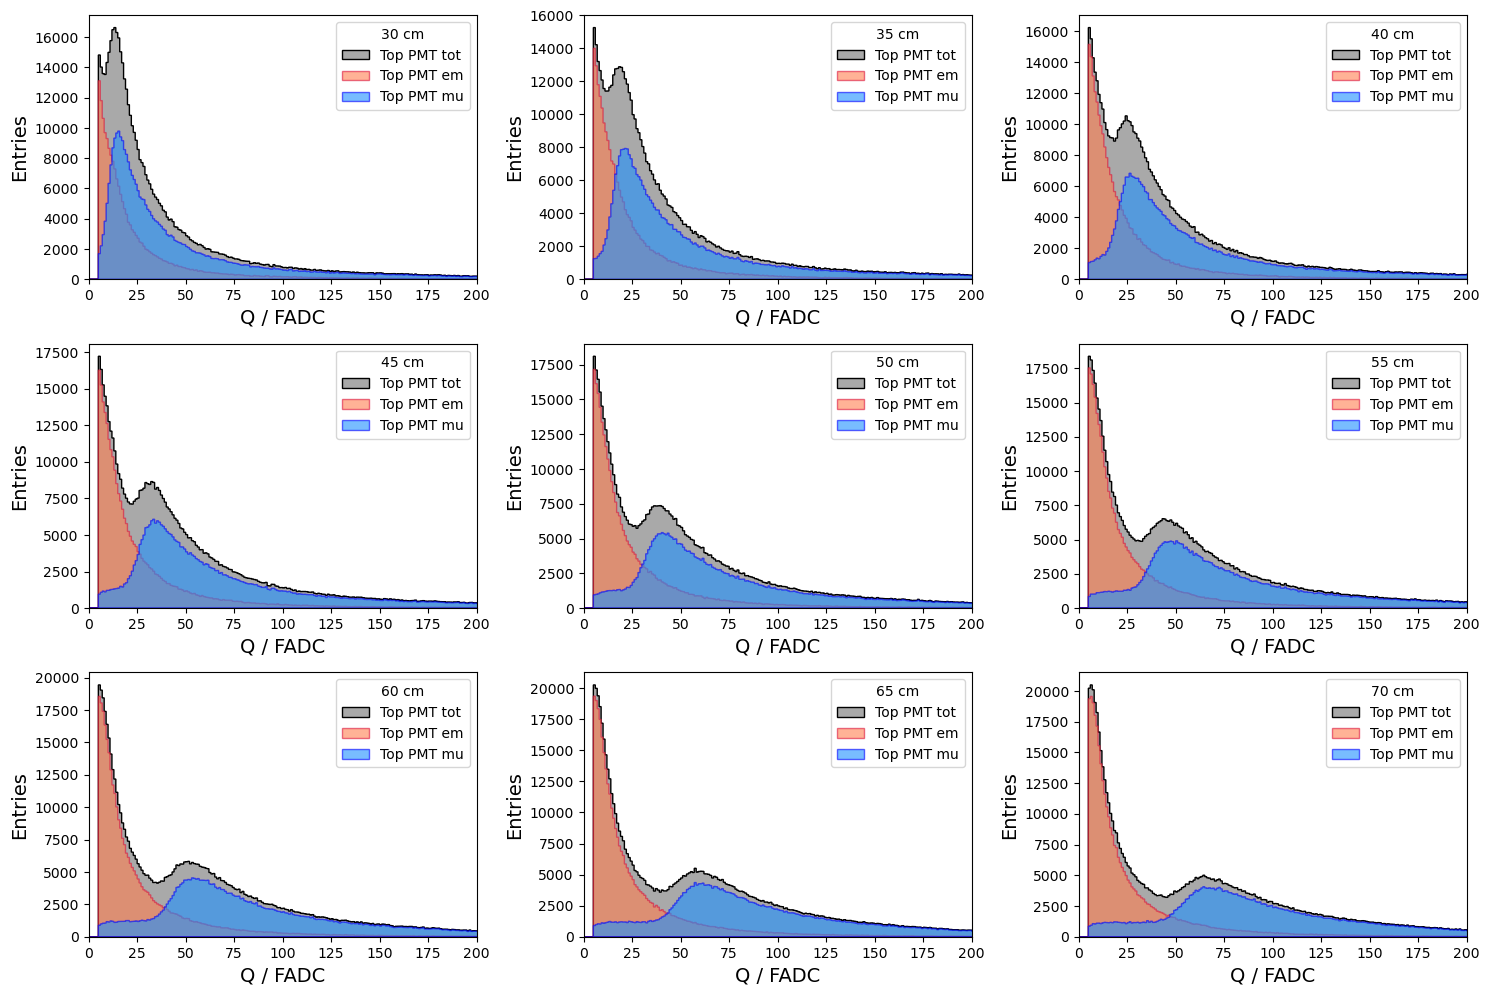

In [ ]:
input_folder = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/t2b_simu/'
#input_files = ['top_30cm_0.50_3', 'top_35cm_0.50_3', 'top_40cm_0.50_3', 'top_45cm_0.50_3', 'top_50cm_0.50_3', 'top_55cm_0.50_3', 'top_60cm_0.50_3', 'top_65cm_0.50_3','top_70cm_0.50_3']
input_files = ['top_30cm_3', 'top_35cm_3', 'top_40cm_3', 'top_45cm_3', 'top_50cm_3', 'top_55cm_3', 'top_60cm_3', 'top_65cm_3','top_70cm_3']

plt.subplots(3,3, figsize=(15,10))
fadc_bins_fit = np.arange(0,1000,FADC_BIN_WIDTH)
fadc_bin_centers = (fadc_bins_fit[:-1] + fadc_bins_fit[1:]) / 2.

leg_title = ['30 cm','35 cm','40 cm','45 cm','50 cm','55 cm','60 cm','65 cm','70 cm']

f_w_em = 1.
min_npe_th = 5
coinc = True 

for i, file in enumerate(input_files):

    plt.subplot(3,3,i+1)

    pmt_tot = load_top_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th, top_bottom_coinc=coinc)
    pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th,top_bottom_coinc=coinc)
    pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th,top_bottom_coinc=coinc)
    
    pmt_4_em,pmt_4_mu, pmt_4_tot  = load_pmt('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/t2b_simu/top_40cm_3',"pmt4_FADC", minnpe=0)

    weights_em = np.full(len(pmt_tot_em), fill_value=f_w_em)  # weight of 2 for each element in a1
    weights_mu = np.ones_like(pmt_tot_mu) 
    weights_tot = np.concatenate((weights_em, weights_mu))

    pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
    entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Top PMT tot', weights = weights_tot )

    plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='Top PMT em', weights = weights_em)
    plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label='Top PMT mu')
   
    plt.xlim(0,200)

    plt.legend(title = leg_title[i])
    plt.yscale('linear')
    plt.xlabel('Q / FADC',size=14)
    plt.ylabel('Entries',size=14)


plt.tight_layout()
plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/top_pmt_weight_'+str(int(f_w_em))+'_coinc.pdf')

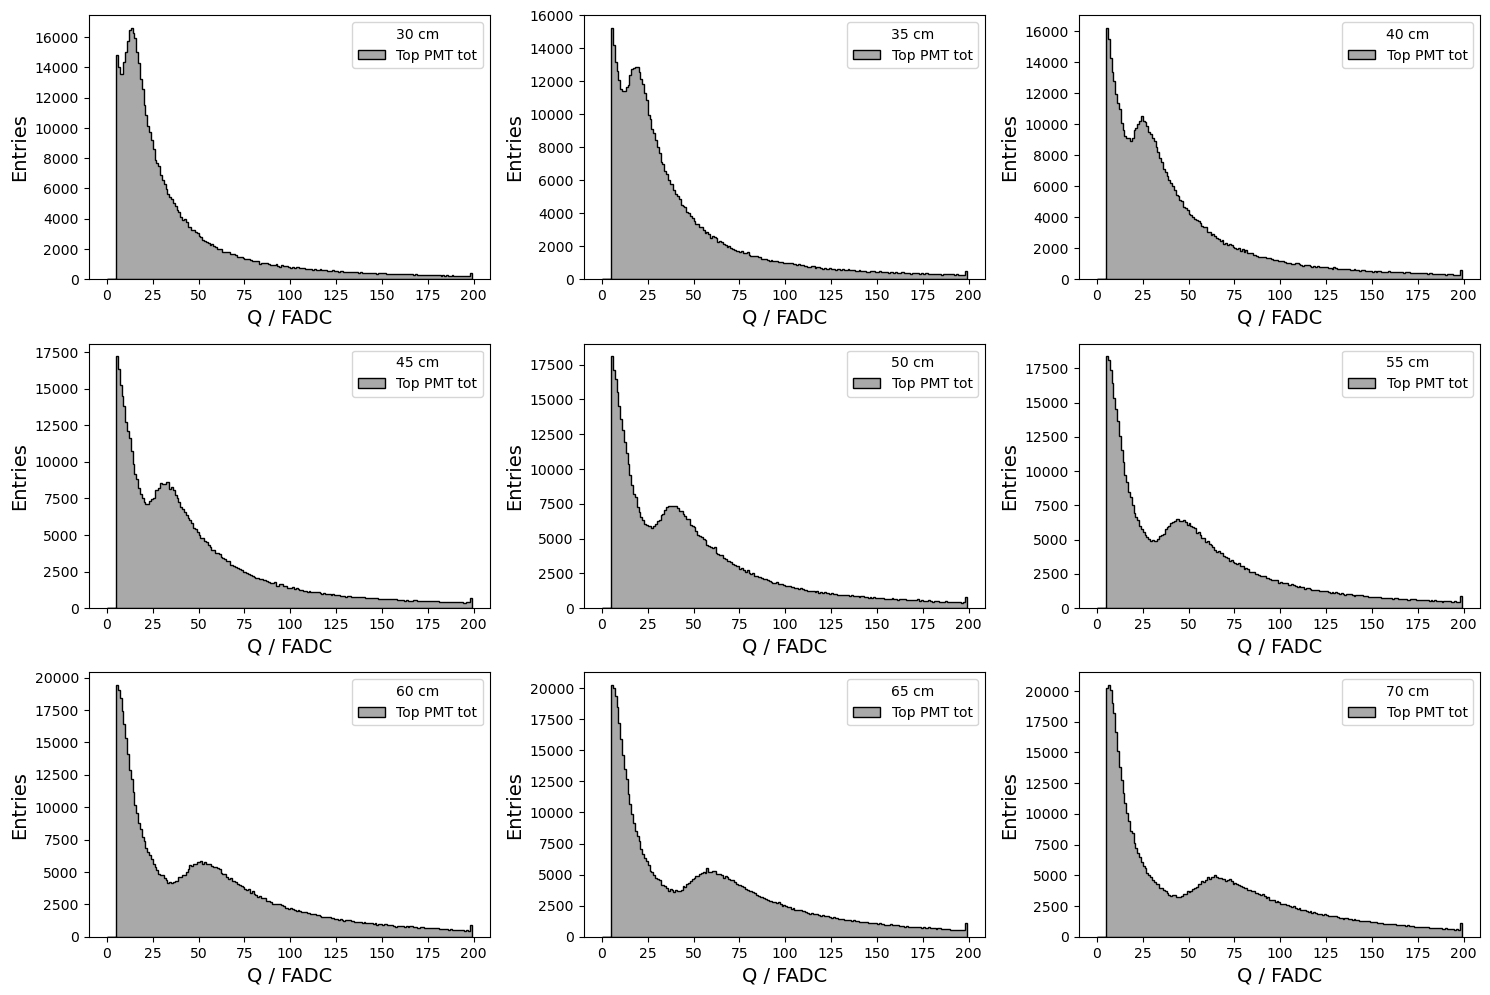

In [14]:

plt.subplots(3,3, figsize=(15,10))
fadc_bins_fit = np.arange(0,200,FADC_BIN_WIDTH)
fadc_bin_centers = (fadc_bins_fit[:-1] + fadc_bins_fit[1:]) / 2.

for i, file in enumerate(input_files):

    plt.subplot(3,3,i+1)

    pmt_tot = load_top_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th,top_bottom_coinc=coinc)
    pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th,top_bottom_coinc=coinc)
    pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th,top_bottom_coinc=coinc)

    weights_em = np.full(len(pmt_tot_em), fill_value=f_w_em)  # weight of 2 for each element in a1
    weights_mu = np.ones_like(pmt_tot_mu) 
    weights_tot = np.concatenate((weights_em, weights_mu))

    pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
    entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Top PMT tot', weights = weights_tot )

    #plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='Top PMT em', weights = weights_em)
    #plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label='Top PMT mu')
   


    plt.legend(title = leg_title[i])
    plt.yscale('linear')
    plt.xlabel('Q / FADC',size=14)
    plt.ylabel('Entries',size=14)


plt.tight_layout()
plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/top_tot_pmt_weight_'+str(int(f_w_em))+'.pdf')

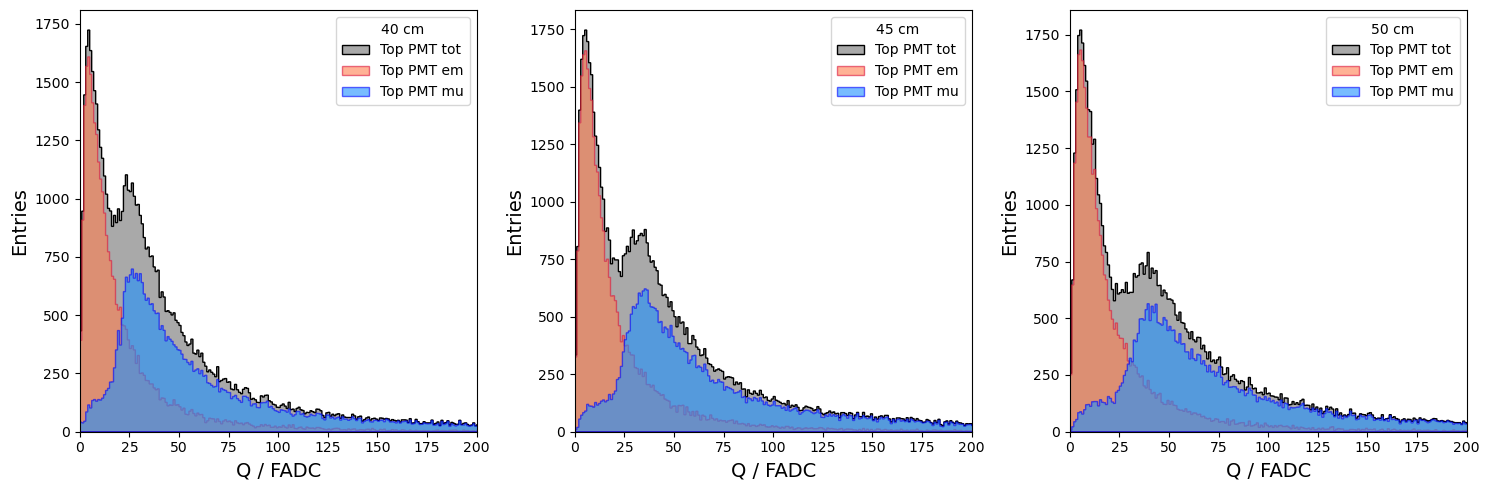

In [15]:
fadc_per_pe_string = '50'

input_folder = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/'
input_files = ['top_40cm_0.'+fadc_per_pe_string+'_3', 'top_45cm_0.'+fadc_per_pe_string+'_3', 'top_50cm_0.'+fadc_per_pe_string+'_3']

plt.subplots(1,3, figsize=(15,5))
fadc_bins_fit = np.arange(0,1000,FADC_BIN_WIDTH)
fadc_bin_centers = (fadc_bins_fit[:-1] + fadc_bins_fit[1:]) / 2.

leg_title = ['40 cm','45 cm','50 cm']

f_w_em = 1
min_npe_th = 0
coinc = False 

for i, file in enumerate(input_files):

    plt.subplot(1,3,i+1)

    pmt_tot = load_top_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th, top_bottom_coinc=coinc)
    pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th,top_bottom_coinc=coinc)
    pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+file, minnpe=min_npe_th,top_bottom_coinc=coinc)
    
    pmt_4_em,pmt_4_mu, pmt_4_tot  = load_pmt('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/top_40cm_3',"pmt4_FADC", minnpe=0)

    weights_em = np.full(len(pmt_tot_em), fill_value=f_w_em)  # weight of 2 for each element in a1
    weights_mu = np.ones_like(pmt_tot_mu) 
    weights_tot = np.concatenate((weights_em, weights_mu))

    pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
    entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Top PMT tot', weights = weights_tot )

    plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='Top PMT em', weights = weights_em)
    plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label='Top PMT mu')
   
    plt.xlim(0,200)

    plt.legend(title = leg_title[i])
    plt.yscale('linear')
    plt.xlabel('Q / FADC',size=14)
    plt.ylabel('Entries',size=14)


plt.tight_layout()
plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/top_pmt_weight_'+str(float(f_w_em))+'_0_'+str(fadc_per_pe_string)+'.pdf')


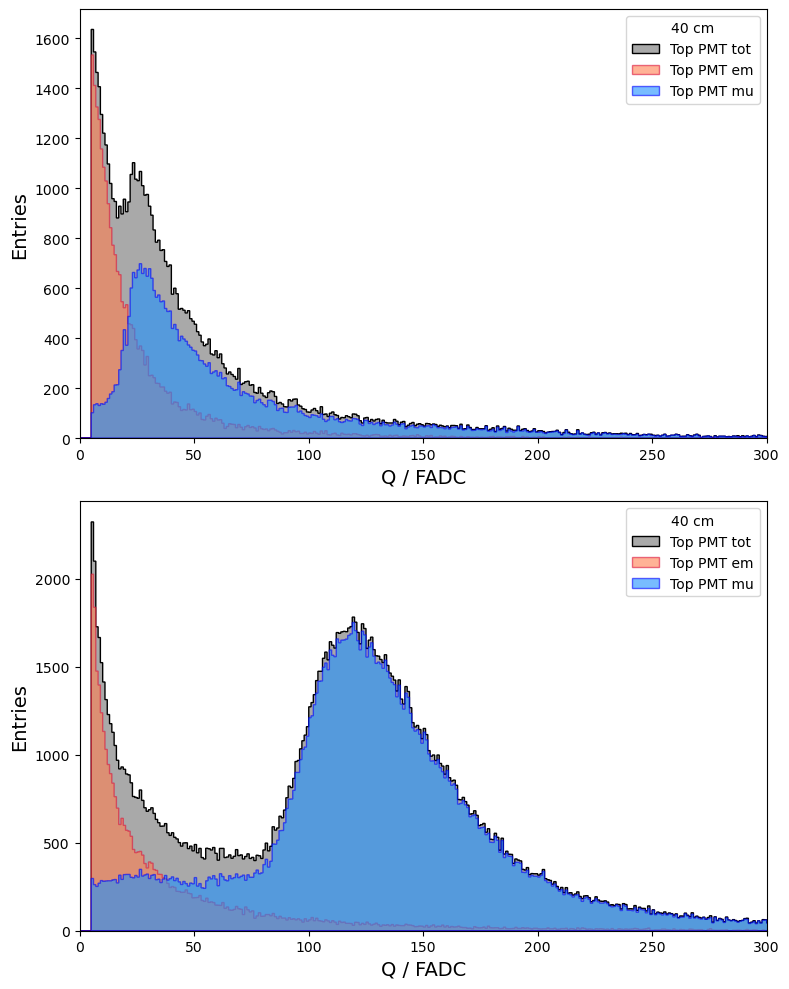

In [16]:
plt.subplots(2,1,figsize=(8,10))

plt.subplot(2,1,1)
pmt_tot = load_top_sum_fadc_pmt(input_folder+'top_40cm_0.50_3', minnpe=5, top_bottom_coinc=False)
pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+'top_40cm_0.50_3', minnpe=5, top_bottom_coinc=False)
pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+'top_40cm_0.50_3', minnpe=5, top_bottom_coinc=False)

pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Top PMT tot' )

plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='Top PMT em')
plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label='Top PMT mu')

plt.xlim(0,300)
plt.legend(title = '40 cm')
plt.yscale('linear')
plt.xlabel('Q / FADC',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(2,1,2)

pmt_4_em,pmt_4_mu, pmt_4_tot  = load_pmt('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/t2b_simu/top_40cm_3',"pmt4_FADC", minnpe=5)

entries, bin, fig = plt.hist(pmt_4_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Top PMT tot' )
plt.hist(pmt_4_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label='Top PMT em')
plt.hist(pmt_4_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label='Top PMT mu')

plt.xlim(0,300)
plt.legend(title = '40 cm')
plt.yscale('linear')
plt.xlabel('Q / FADC',size=14)
plt.ylabel('Entries',size=14)

plt.tight_layout()

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/top_bottom_PMT_no_coinc.pdf')

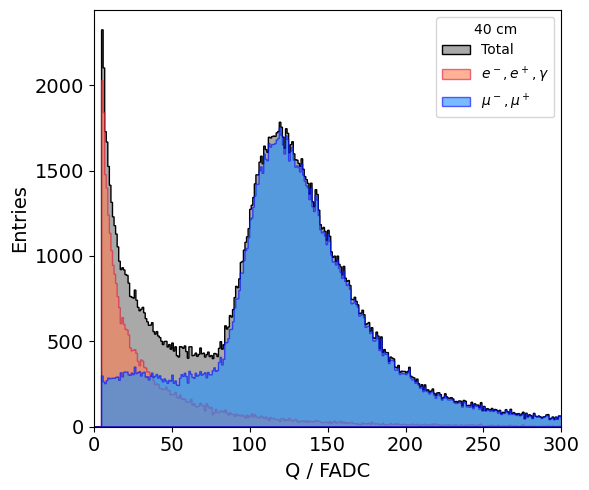

In [17]:
plt.figure(figsize=(6,5))
pmt_4_em,pmt_4_mu, pmt_4_tot  = load_pmt('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/t2b_simu/top_40cm_3',"pmt4_FADC", minnpe=5)

entries, bin, fig = plt.hist(pmt_4_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Total' )
plt.hist(pmt_4_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label=r'$e^-, e^+, \gamma$')
plt.hist(pmt_4_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label=r'$\mu^-, \mu^+$')

plt.xlim(0,300)
plt.legend(title = '40 cm')
plt.yscale('linear')
plt.xlabel('Q / FADC',size=14)
plt.ylabel('Entries',size=14)

#plt.vlines(163,ymin = 0, ymax = 2300, color = 'forestgreen', linestyle = '--', linewidth = 3)

plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/bottom_PMT_FADC.pdf')

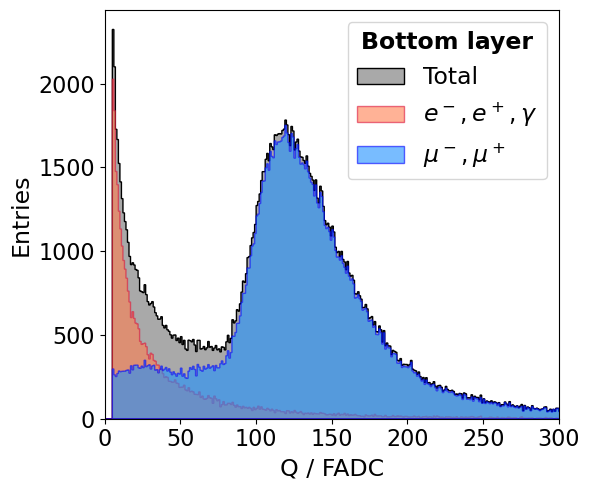

In [18]:
plt.figure(figsize=(6,5))
pmt_4_em,pmt_4_mu, pmt_4_tot  = load_pmt('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/t2b_simu/top_40cm_3',"pmt4_FADC", minnpe=5)

entries, bin, fig = plt.hist(pmt_4_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Total' )
plt.hist(pmt_4_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label=r'$e^-, e^+, \gamma$')
plt.hist(pmt_4_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label=r'$\mu^-, \mu^+$')
plt.xlim(0,300)

plt.legend(
    title=r"Bottom layer",
    title_fontproperties={'weight':'bold', 'size':17},
    prop={'size': 17})
plt.yscale('linear')
plt.xlabel('Q / FADC',size=17)
plt.ylabel('Entries',size=17)

#plt.vlines(163,ymin = 0, ymax = 2300, color = 'forestgreen', linestyle = '--', linewidth = 3)

plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/bottom_PMT_FADC_nolegendtitle.pdf')

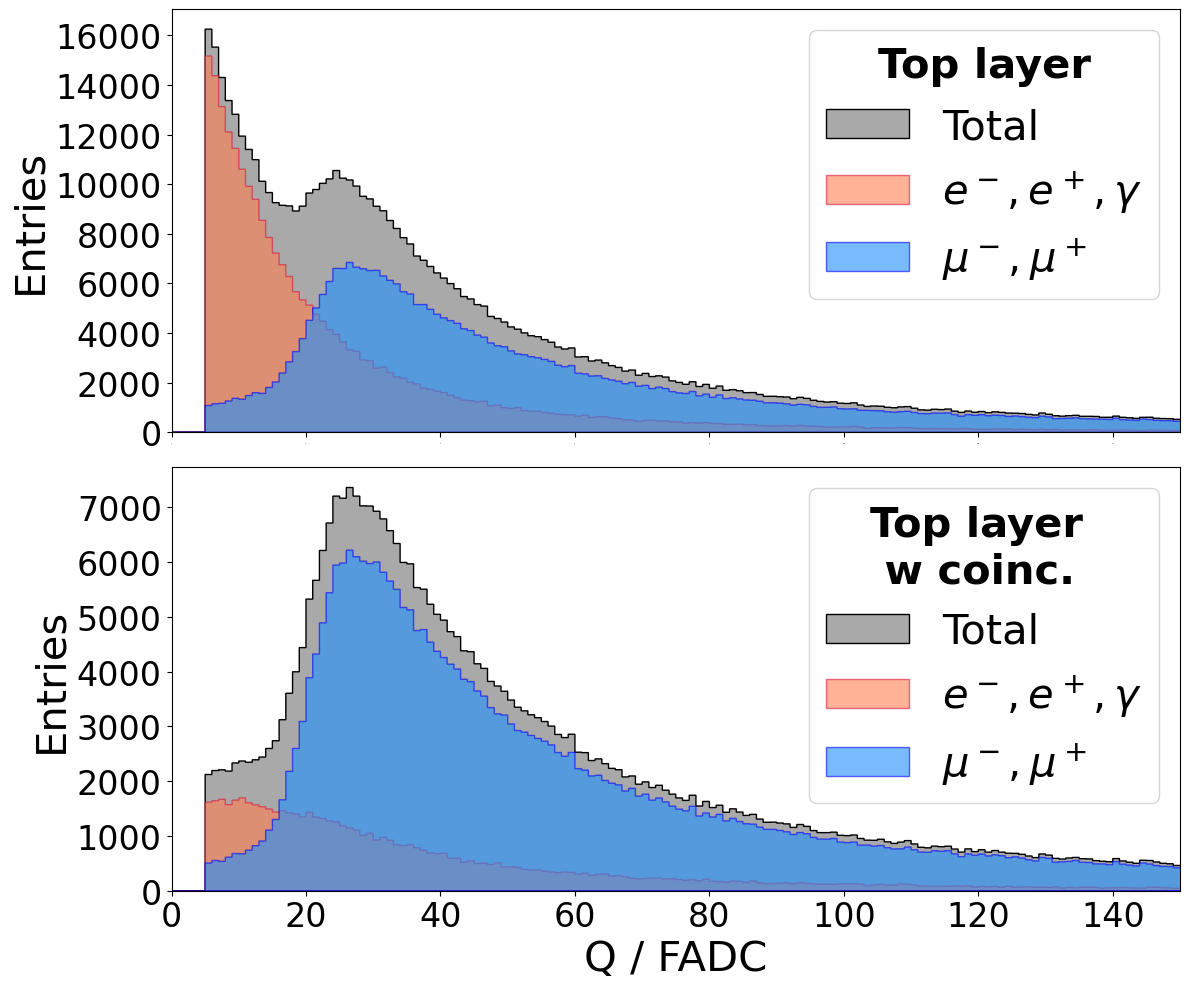

In [19]:
fig, ax = plt.subplots(2,1,figsize=(12,10))
input_folder = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/t2b_simu/'

plt.subplot(2,1,1)
pmt_tot = load_top_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=False)
pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=False)
pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=False)

pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Total')

plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label=r'$e^-, e^+, \gamma$')
plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6,  label=r'$\mu^-, \mu^+$')

plt.xlim(0,150)
plt.legend(
    title=r"Top layer",
    title_fontproperties={'weight':'bold', 'size':30},
    prop={'size': 30})

plt.yscale('linear')
#plt.xlabel('Q / FADC',size=30)
plt.ylabel('Entries',size=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=24)

#plt.vlines(44,ymin = 0, ymax = 25000, color = 'forestgreen', linestyle = '--', linewidth = 3)

plt.subplot(2,1,2)
pmt_tot = load_top_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=True)
pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=True)
pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=True)

pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Total')

plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label=r'$e^-, e^+, \gamma$')
plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label=r'$\mu^-, \mu^+$')

plt.xlim(0,150)
plt.legend(
    title="Top layer \n w coinc.",
    title_fontproperties={'weight':'bold', 'size':30},
    prop={'size': 30})
plt.yscale('linear')
plt.xlabel('Q / FADC',size=30)
plt.ylabel('Entries',size=30)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

#plt.vlines(44,ymin = 0, ymax = 12000, color = 'forestgreen', linestyle = '--', linewidth = 3)

plt.tight_layout()

plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/top_PMT_no_coinc_plus_coinc.pdf')

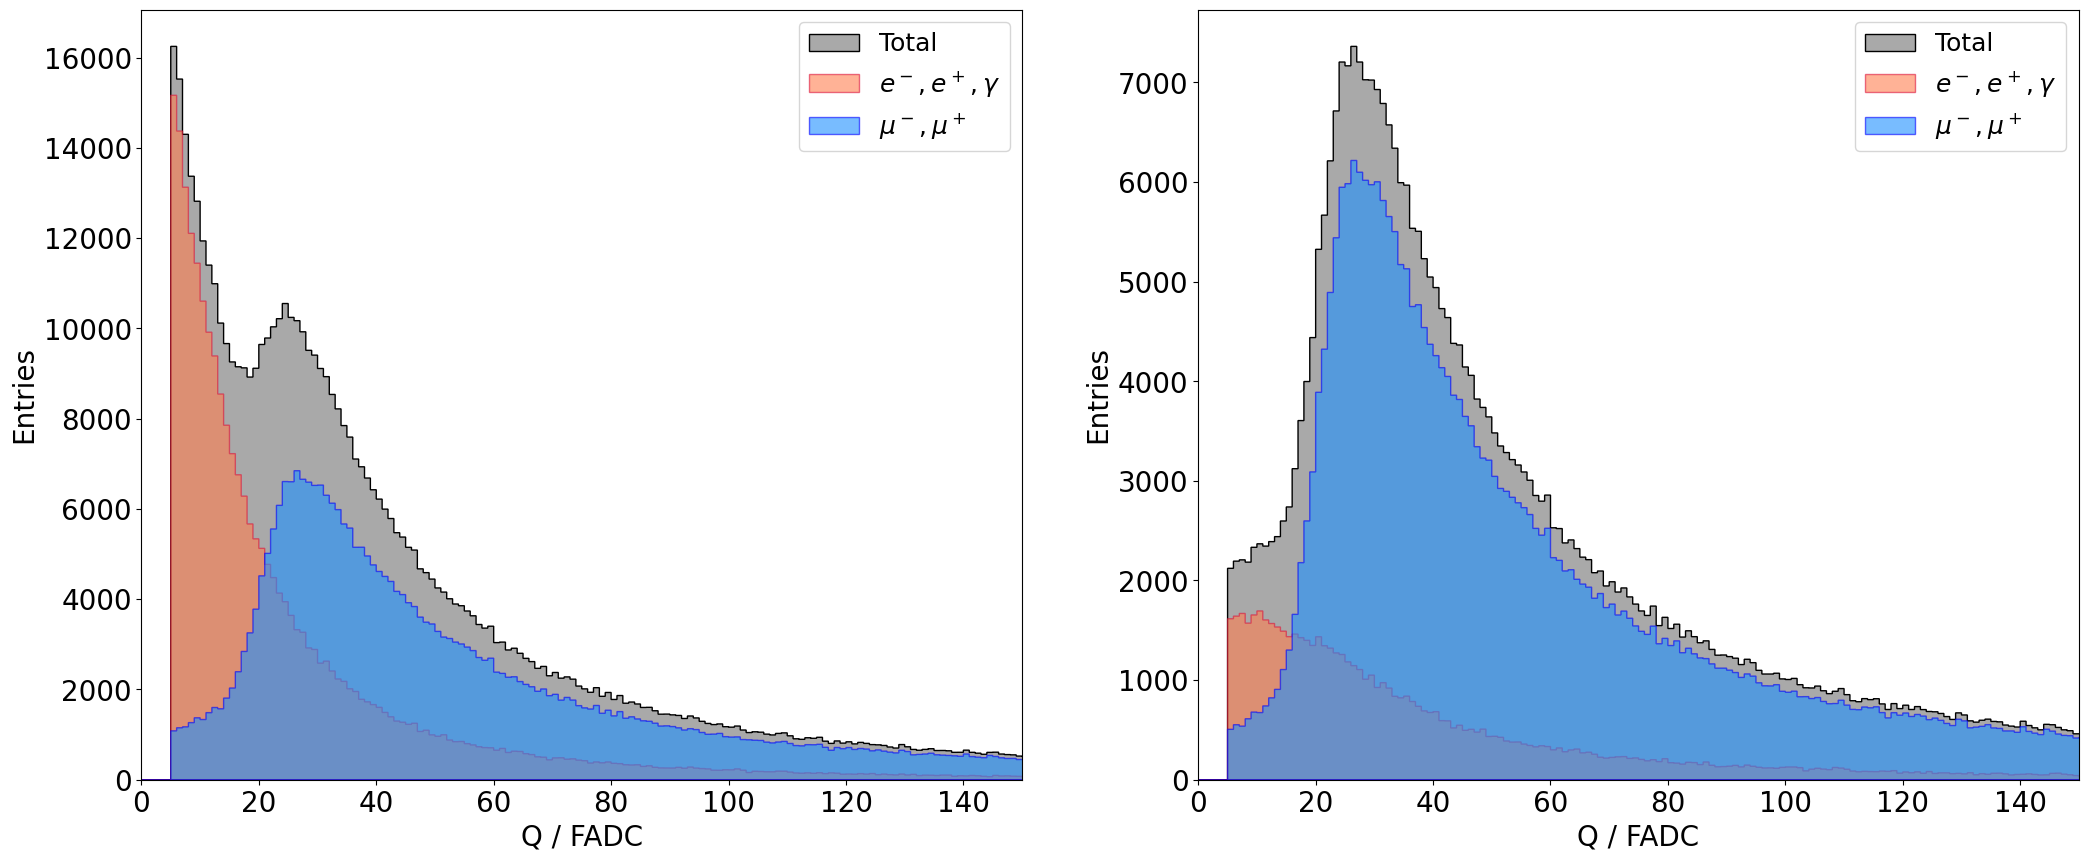

In [20]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
input_folder = '/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/output/t2b_simu/'

plt.subplot(1,2,1)
pmt_tot = load_top_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=False)
pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=False)
pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=False)

pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Total')

plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label=r'$e^-, e^+, \gamma$')
plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6,  label=r'$\mu^-, \mu^+$')

plt.xlim(0,150)
plt.legend(prop={'size': 18})
plt.yscale('linear')
plt.xlabel('Q / FADC',size=20)
plt.ylabel('Entries',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.vlines(44,ymin = 0, ymax = 25000, color = 'forestgreen', linestyle = '--', linewidth = 3)

plt.subplot(1,2,2)
pmt_tot = load_top_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=True)
pmt_tot_em = load_top_em_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=True)
pmt_tot_mu = load_top_mu_sum_fadc_pmt(input_folder+'top_40cm_3', minnpe=5, top_bottom_coinc=True)

pmt_tot = np.concatenate((pmt_tot_em, pmt_tot_mu))
entries, bin, fig = plt.hist(pmt_tot, bins=fadc_bins_fit, color='darkgray',edgecolor='black',histtype= "stepfilled", label='Total')

plt.hist(pmt_tot_em, bins=fadc_bins_fit, color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label=r'$e^-, e^+, \gamma$')
plt.hist(pmt_tot_mu, bins=fadc_bins_fit, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label=r'$\mu^-, \mu^+$')

plt.xlim(0,150)
plt.legend(prop={'size': 18})
plt.yscale('linear')
plt.xlabel('Q / FADC',size=20)
plt.ylabel('Entries',size=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.vlines(44,ymin = 0, ymax = 12000, color = 'forestgreen', linestyle = '--', linewidth = 3)


plt.savefig('/Users/workspace/Software/Pierre_Tank/Top_Height_Scan/plots/top_PMT_no_coinc_plus_coinc_square.pdf')